<H1>데이터 전처리</H1>
<H6>Raw 데이터를 이용한 데이터 전처리를 진행하는 코드입니다.</H6>
<br>

> 하단에 final.csv 파일로 진행되는 파이토치 코드가 있습니다.





In [ ]:
import pandas as pd
from functools import reduce

In [ ]:
samsung = pd.read_csv("005930 과거 데이터.csv")
snp = pd.read_csv("S&P 500 과거 데이터.csv")
wondollar = pd.read_csv("USD_KRW 과거 데이터.csv")
copper = pd.read_csv("구리 선물 과거 데이터.csv")
nasdaq = pd.read_csv("나스닥종합지수 과거 데이터.csv")
kospi = pd.read_csv("코스피지수 과거 데이터.csv")

In [ ]:
# 삼성: 종가 // snp :종가 //원달러 : 종가 // 구리 : 종가 // 나스닥 : 종가.거래량 // 코스피 : 종가, 변동량

# 데이터프레임 리스트와 각 데이터프레임의 이름 리스트
dfs = [samsung, snp, wondollar, copper, nasdaq, kospi]
names = ['samsung', 'snp', 'wondollar', 'copper', 'nasdaq', 'kospi']

def rename2_ (name):
    name.rename(columns={'날짜':'date'}, inplace=True)

for i2 in dfs:
    rename2_(i2)

# 각 데이터프레임에 대해 이름을 변경하는 함수
def rename_closeprice(df, name):
    df.rename(columns={'종가': f'{name}_closeprice'}, inplace=True)


# 각 데이터프레임에 대해 이름을 활용하여 열 이름 변경
for df, name in zip(dfs, names):
    rename_closeprice(df, name)

nasdaq.rename(columns={'거래량' : 'nasdaq_volume'}, inplace=True)
kospi.rename(columns={'변동 %' : 'kospi_volatility'}, inplace=True)

In [ ]:
con_list = [samsung[['date','samsung_closeprice']],snp[['date', 'snp_closeprice']], wondollar[['date', 'wondollar_closeprice']],
            copper[['date', 'copper_closeprice']], nasdaq[['date', 'nasdaq_closeprice', 'nasdaq_volume']],
            kospi[['date', 'kospi_closeprice', 'kospi_volatility']]]

final_out = reduce(lambda left, right: pd.merge(left, right, on='date', how = 'outer'), con_list)

In [ ]:
final_out.columns

Index(['date', 'samsung_closeprice', 'snp_closeprice', 'wondollar_closeprice',
       'copper_closeprice', 'nasdaq_closeprice', 'nasdaq_volume',
       'kospi_closeprice', 'kospi_volatility'],
      dtype='object')

In [ ]:
cols = ['samsung_closeprice', 'snp_closeprice', 'wondollar_closeprice', 'copper_closeprice', 'nasdaq_closeprice', 'nasdaq_volume', 'kospi_closeprice', 'kospi_volatility']

for col in cols:
    final_out[col] = final_out[col].interpolate(method='linear')
    final_out[col] = final_out[col].fillna(method='bfill') # backward filling
    final_out[col] = final_out[col].fillna(method='ffill') # backward filling

In [ ]:
columns_to_convert = ['samsung_closeprice', 'snp_closeprice', 'wondollar_closeprice',
                      'nasdaq_closeprice', 'kospi_closeprice']

for col in columns_to_convert:
    final_out[col] = final_out[col].str.replace(',', '').astype(float)

final_out['kospi_volatility'] = final_out['kospi_volatility'].str.replace('%', '').astype(float)

In [ ]:
for i in range(len(final_out['nasdaq_volume'])):
    if 'M' in final_out.loc[i, 'nasdaq_volume']:
        final_out.at[i, 'nasdaq_volume'] = float(final_out.at[i, 'nasdaq_volume'].replace('M', '')) * 1000000

    elif 'B' in final_out.loc[i, 'nasdaq_volume']:
        final_out.at[i, 'nasdaq_volume'] = float(final_out.at[i, 'nasdaq_volume'].replace('B', '')) * 1000000000

final_out['nasdaq_volume'] = final_out['nasdaq_volume'].astype(float)

In [ ]:
final_out.head()

,date,samsung_closeprice,snp_closeprice,wondollar_closeprice,copper_closeprice,nasdaq_closeprice,nasdaq_volume,kospi_closeprice,kospi_volatility
0,2023- 10- 31,66900.0,4193.80,1352.15,3.64900,12851.24,914040000.0,2277.99,-1.41
1,2023- 10- 30,67300.0,4166.82,1345.63,3.65850,12789.48,801650000.0,2310.55,0.34
2,2023- 10- 29,67300.0,4117.37,1354.91,3.65225,12643.01,856380000.0,2302.81,0.16
3,2023- 10- 27,67300.0,4117.37,1354.91,3.64600,12643.01,856380000.0,2302.81,0.16
4,2023- 10- 26,66700.0,4137.23,1352.69,3.58450,12595.61,941240000.0,2299.08,-2.71


In [ ]:
from datetime import date
final_out['date'] = pd.to_datetime(final_out['date'], format='%Y- %m- %d')

In [ ]:
final_out_sorted = final_out.sort_values(by='date').reset_index(drop=True)
final_out_sorted.set_index('date', inplace=True)

In [ ]:
final_out_sorted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1754 entries, 2018-01-01 to 2023-10-31
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   samsung_closeprice    1754 non-null   float64
 1   snp_closeprice        1754 non-null   float64
 2   wondollar_closeprice  1754 non-null   float64
 3   copper_closeprice     1754 non-null   float64
 4   nasdaq_closeprice     1754 non-null   float64
 5   nasdaq_volume         1754 non-null   float64
 6   kospi_closeprice      1754 non-null   float64
 7   kospi_volatility      1754 non-null   float64
dtypes: float64(8)
memory usage: 123.3 KB


In [ ]:
final_out_sorted.to_csv("final.csv")

<h1>파이토치</h1>
<H6>final.csv 파일로 진행되는 파이토치 LSTM 코드입니다.</H6>

In [ ]:
import numpy as np
import torch.nn.init as init
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

In [ ]:
sam = pd.read_csv("final.csv")
sam.set_index('date', inplace= True)

In [ ]:
sam.columns #총 변수 8개

Index(['samsung_closeprice', 'snp_closeprice', 'wondollar_closeprice',
       'copper_closeprice', 'nasdaq_closeprice', 'nasdaq_volume',
       'kospi_closeprice', 'kospi_volatility'],
      dtype='object')

In [ ]:
sam.head()

,samsung_closeprice,snp_closeprice,wondollar_closeprice,copper_closeprice,nasdaq_closeprice,nasdaq_volume,kospi_closeprice,kospi_volatility
date,,,,,,,,
2018-01-01,51020.0,2731.20,1066.60,3.1680,7256.43,508640000.0,2515.38,0.92
2018-01-02,51020.0,2695.81,1063.21,3.2780,7006.90,462200000.0,2479.65,0.49
2018-01-03,51620.0,2713.06,1064.80,3.2575,7065.53,483920000.0,2486.35,0.27
2018-01-04,51080.0,2723.99,1062.28,3.2630,7077.91,493870000.0,2466.46,-0.80
2018-01-05,52120.0,2743.15,1062.09,3.2295,7136.56,476410000.0,2497.52,1.26


In [ ]:
scaler = StandardScaler()
#scaler = MinMaxScaler(feature_range= (-1, 1))
col = list(sam.columns)
sam[col] = scaler.fit_transform(sam[col])

#종속, 독립변수 설정
x = sam.drop('samsung_closeprice', axis=1).values
y = sam['samsung_closeprice'].values

#시퀀스 데이터 생성
def seq_data(x, y, sequence_length):
    x_seq = []
    y_seq = []

    for i in range(len(x) - sequence_length):
        x_seq.append(x[i : i + sequence_length])
        y_seq.append(y[i + sequence_length])

    # 텐서로 변환하기 전에 NumPy 배열로 변환(UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow.
    # Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor.)

    x_seq = np.array(x_seq)
    y_seq = np.array(y_seq)

    # 텐서로 변환
    x_tensor = torch.FloatTensor(x_seq)
    y_tensor = torch.FloatTensor(y_seq).view(-1, 1)

    return x_tensor, y_tensor


In [ ]:
split = 1200
sequence_length = 30
#sequence_length = 7
x_seq, y_seq = seq_data(x, y, sequence_length)

#순서대로 1200개는 학습, 나머지는 평가
x_train_seq = x_seq[:split]
y_train_seq = y_seq[:split]

x_test_seq = x_seq[split:]
y_test_seq = y_seq[split:]

print(x_train_seq.shape, y_train_seq.shape)
print(x_test_seq.shape, y_test_seq.shape)

torch.Size([1200, 30, 7]) torch.Size([1200, 1])
torch.Size([524, 30, 7]) torch.Size([524, 1])


In [ ]:
train = torch.utils.data.TensorDataset(x_train_seq, y_train_seq)
test = torch.utils.data.TensorDataset(x_test_seq, y_test_seq)

batch_size = 14
train_loader = torch.utils.data.DataLoader(dataset=train, batch_size = batch_size, shuffle= False)
test_loader = torch.utils.data.DataLoader(dataset=test, batch_size = batch_size, shuffle= False)

In [ ]:
input_size = x_seq.size(2)
num_layers = 2
hidden_size = 16


class XavierLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, sequence_length, num_layers, dropout_rate):
        super(XavierLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_rate)

        # Xavier 초기화를 적용
        self.init_weights()
        self.fc = nn.Linear(hidden_size * sequence_length, 1)

    def init_weights(self):
        for name, param in self.lstm.named_parameters():
            if 'weight' in name:
                init.xavier_uniform_(param.data)
            elif 'bias' in name:
                init.constant_(param.data, 0)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = out.reshape(out.shape[0], -1)
        out = self.fc(out)
        return out


In [ ]:
model = XavierLSTM(input_size, hidden_size, sequence_length, num_layers, dropout_rate= 0.25)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
num_epochs =1001

In [ ]:
loss_graph = []
n = len(train_loader)

for epoch in range(num_epochs):
    running_loss = 0.0

    for data in train_loader:

        seq, target = data # 배치 데이터
        out = model(seq)
        loss = criterion(out, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    loss_graph.append(running_loss/n)
    if epoch % 100 == 0:
        print('[epoch: %d] loss: %.4f' %(epoch, running_loss/n))

[epoch: 0] loss: 0.6327
[epoch: 100] loss: 0.0482
[epoch: 200] loss: 0.0290
[epoch: 300] loss: 0.0293
[epoch: 400] loss: 0.0185
[epoch: 500] loss: 0.0166
[epoch: 600] loss: 0.0122
[epoch: 700] loss: 0.0117
[epoch: 800] loss: 0.0108
[epoch: 900] loss: 0.0091
[epoch: 1000] loss: 0.0111


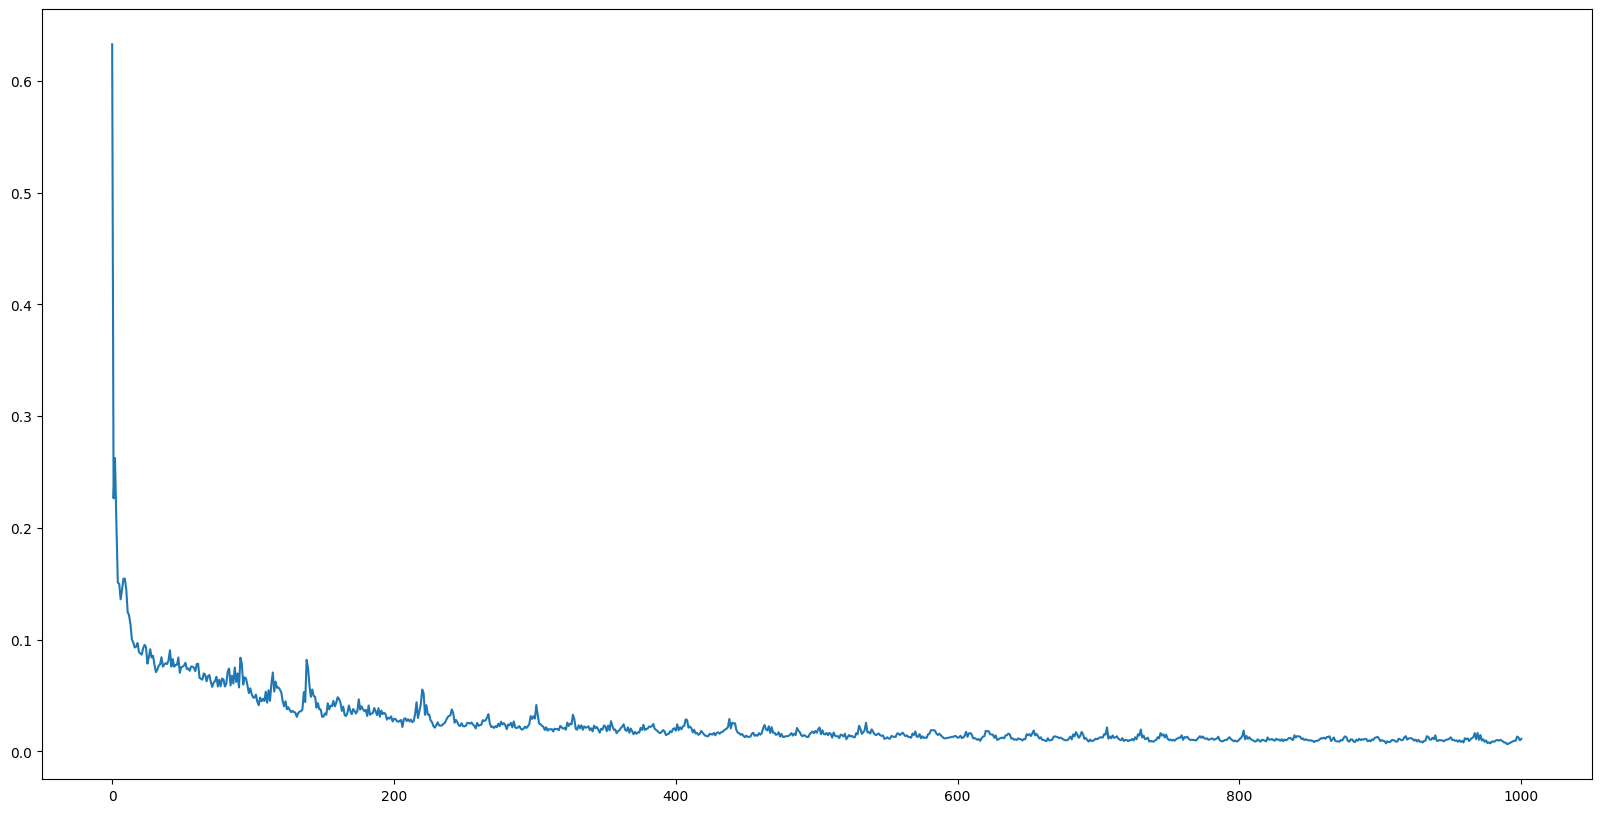

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(loss_graph)
plt.show()
#plt.savefig('loss_graph2.png')

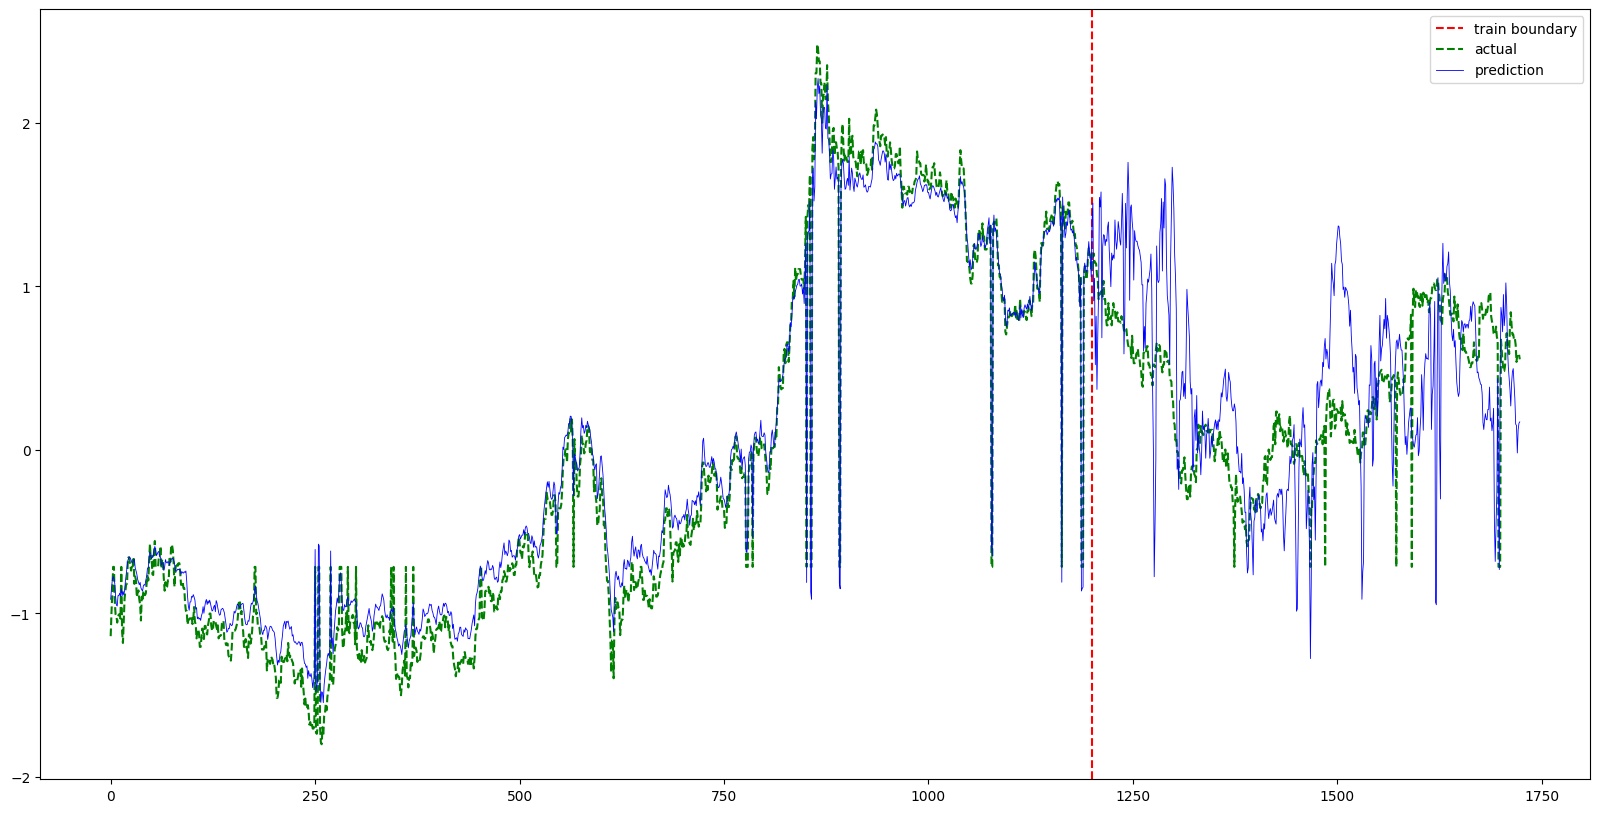

In [ ]:
concatdata = torch.utils.data.ConcatDataset([train, test])
data_loader = torch.utils.data.DataLoader(dataset=concatdata, batch_size=100, shuffle=False)

with torch.no_grad():
    pred = []
    model.eval()
    for data in data_loader:
        seq, target = data
        out = model(seq)
        pred += out.cpu().tolist()

plt.figure(figsize=(20,10))
plt.axvline(x = x_train_seq.size()[0], c = 'r', linestyle = '--')
plt.plot(sam['samsung_closeprice'][sequence_length:].values,'--', c = 'green')
plt.plot(pred,'b', linewidth=0.6)
plt.legend(['train boundary','actual','prediction'])
plt.show()
#plt.savefig('prediction_graph2.png')

In [ ]:

model.eval()

# 예측 수행
preds = []
targets = []
with torch.no_grad():
    for data in test_loader:
        seq, target = data
        output = model(seq)
        preds += output.cpu().tolist()
        targets += target.cpu().tolist()

In [ ]:
# MSE 계산
mse = mean_squared_error(targets, preds)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.28128269202683864
